In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 9,6
import seaborn as sns
import numpy as np

Импортируем данные

In [2]:
train=pd.read_excel('../SB_test/train.xlsx')
test=pd.read_excel('../SB_test/test.xlsx')

In [3]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Бинаризуем целевую переменную

In [4]:
train['y']=train.y.apply(lambda x: 0 if x=='no' else 1)

Удаляем все строчки по которым есть неизвестные данные

In [5]:
train=train.replace('unknown', np.nan)
train=train.dropna()

Бинаризуем данные колонки, т.к. у них остаётся только по 2 значения

In [6]:
train['housing']=train.housing.apply(lambda x: 0 if x=='no' else 1)
train['loan']=train.loan.apply(lambda x: 0 if x=='no' else 1)
train['contact']=train.contact.astype('category').cat.codes

Переводим месяц и день в числовые значения

In [7]:
train['month']=train.month.astype('category').cat.codes
train['day_of_week']=train.day_of_week.astype('category').cat.codes

In [8]:
#Попытка категоризировать возраст - не улучшила скор
#for index, row in train.iterrows():
#    if row['age']<=25:
#        train.loc[index,'age']='25'
#    elif 25<row['age']<=35:
#        train.loc[index,'age']='25-35'
#    elif 35<row['age']<=45:
#        train.loc[index,'age']='35-45'
#    elif row['age']>45:
#        train.loc[index,'age']='45+'

Все остальные фичи переводим в числовые значения

In [9]:
X_train=pd.get_dummies(train)
y_train=X_train['y']

In [10]:
del X_train['y']
del train['default']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Разбиваем выборку для валидации

In [12]:
x_train, x_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Строим модель и валидируем и оцениваем

In [13]:
clf=KNeighborsClassifier().fit(x_train, y_train)

In [14]:
pred=clf.predict(x_val)
pred_pr=clf.predict_proba(x_val)

In [15]:
print('Accuracy: {}'.format(accuracy_score(y_val, pred)))

Accuracy: 0.9016736401673641


In [16]:
print(classification_report(y_val,pred))

             precision    recall  f1-score   support

          0       0.92      0.98      0.94       411
          1       0.75      0.45      0.56        67

avg / total       0.89      0.90      0.89       478



In [17]:
print('ROC_AUC: {}'.format(roc_auc_score(y_val, pred)))

ROC_AUC: 0.711715146893271


In [18]:
fpr,tpr, _ = roc_curve(y_val, pred_pr[:,1])

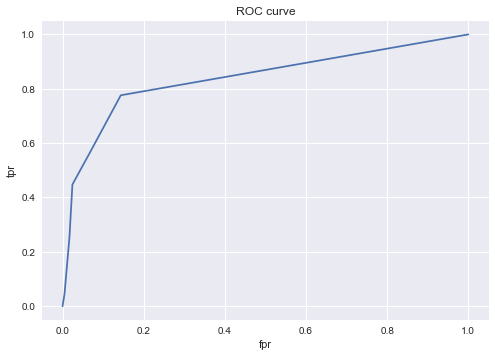

In [19]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve');